<h1 style="font-size: 1.6rem; font-weight: bold">ITO 5047: Fundamentals of Artificial Intelligence</h1>
<h1 style="font-size: 1.6rem; font-weight: bold">Graph Neural Networks</h1>
<p style="margin-top: 5px; margin-bottom: 5px;">Monash University Australia</p>
<p style="margin-top: 5px; margin-bottom: 5px;">Jupyter Notebook by: Tristan Sim Yook Min</p>
References: Information Source from Monash Faculty of Information Technology

---


There are three general types of Graph Neural Networks: Convolutional Graph Neural Networks (GCNs), Graph Attention Networks (GATs), and Recurrent Graph Neural Networks (RGNNs). <br>

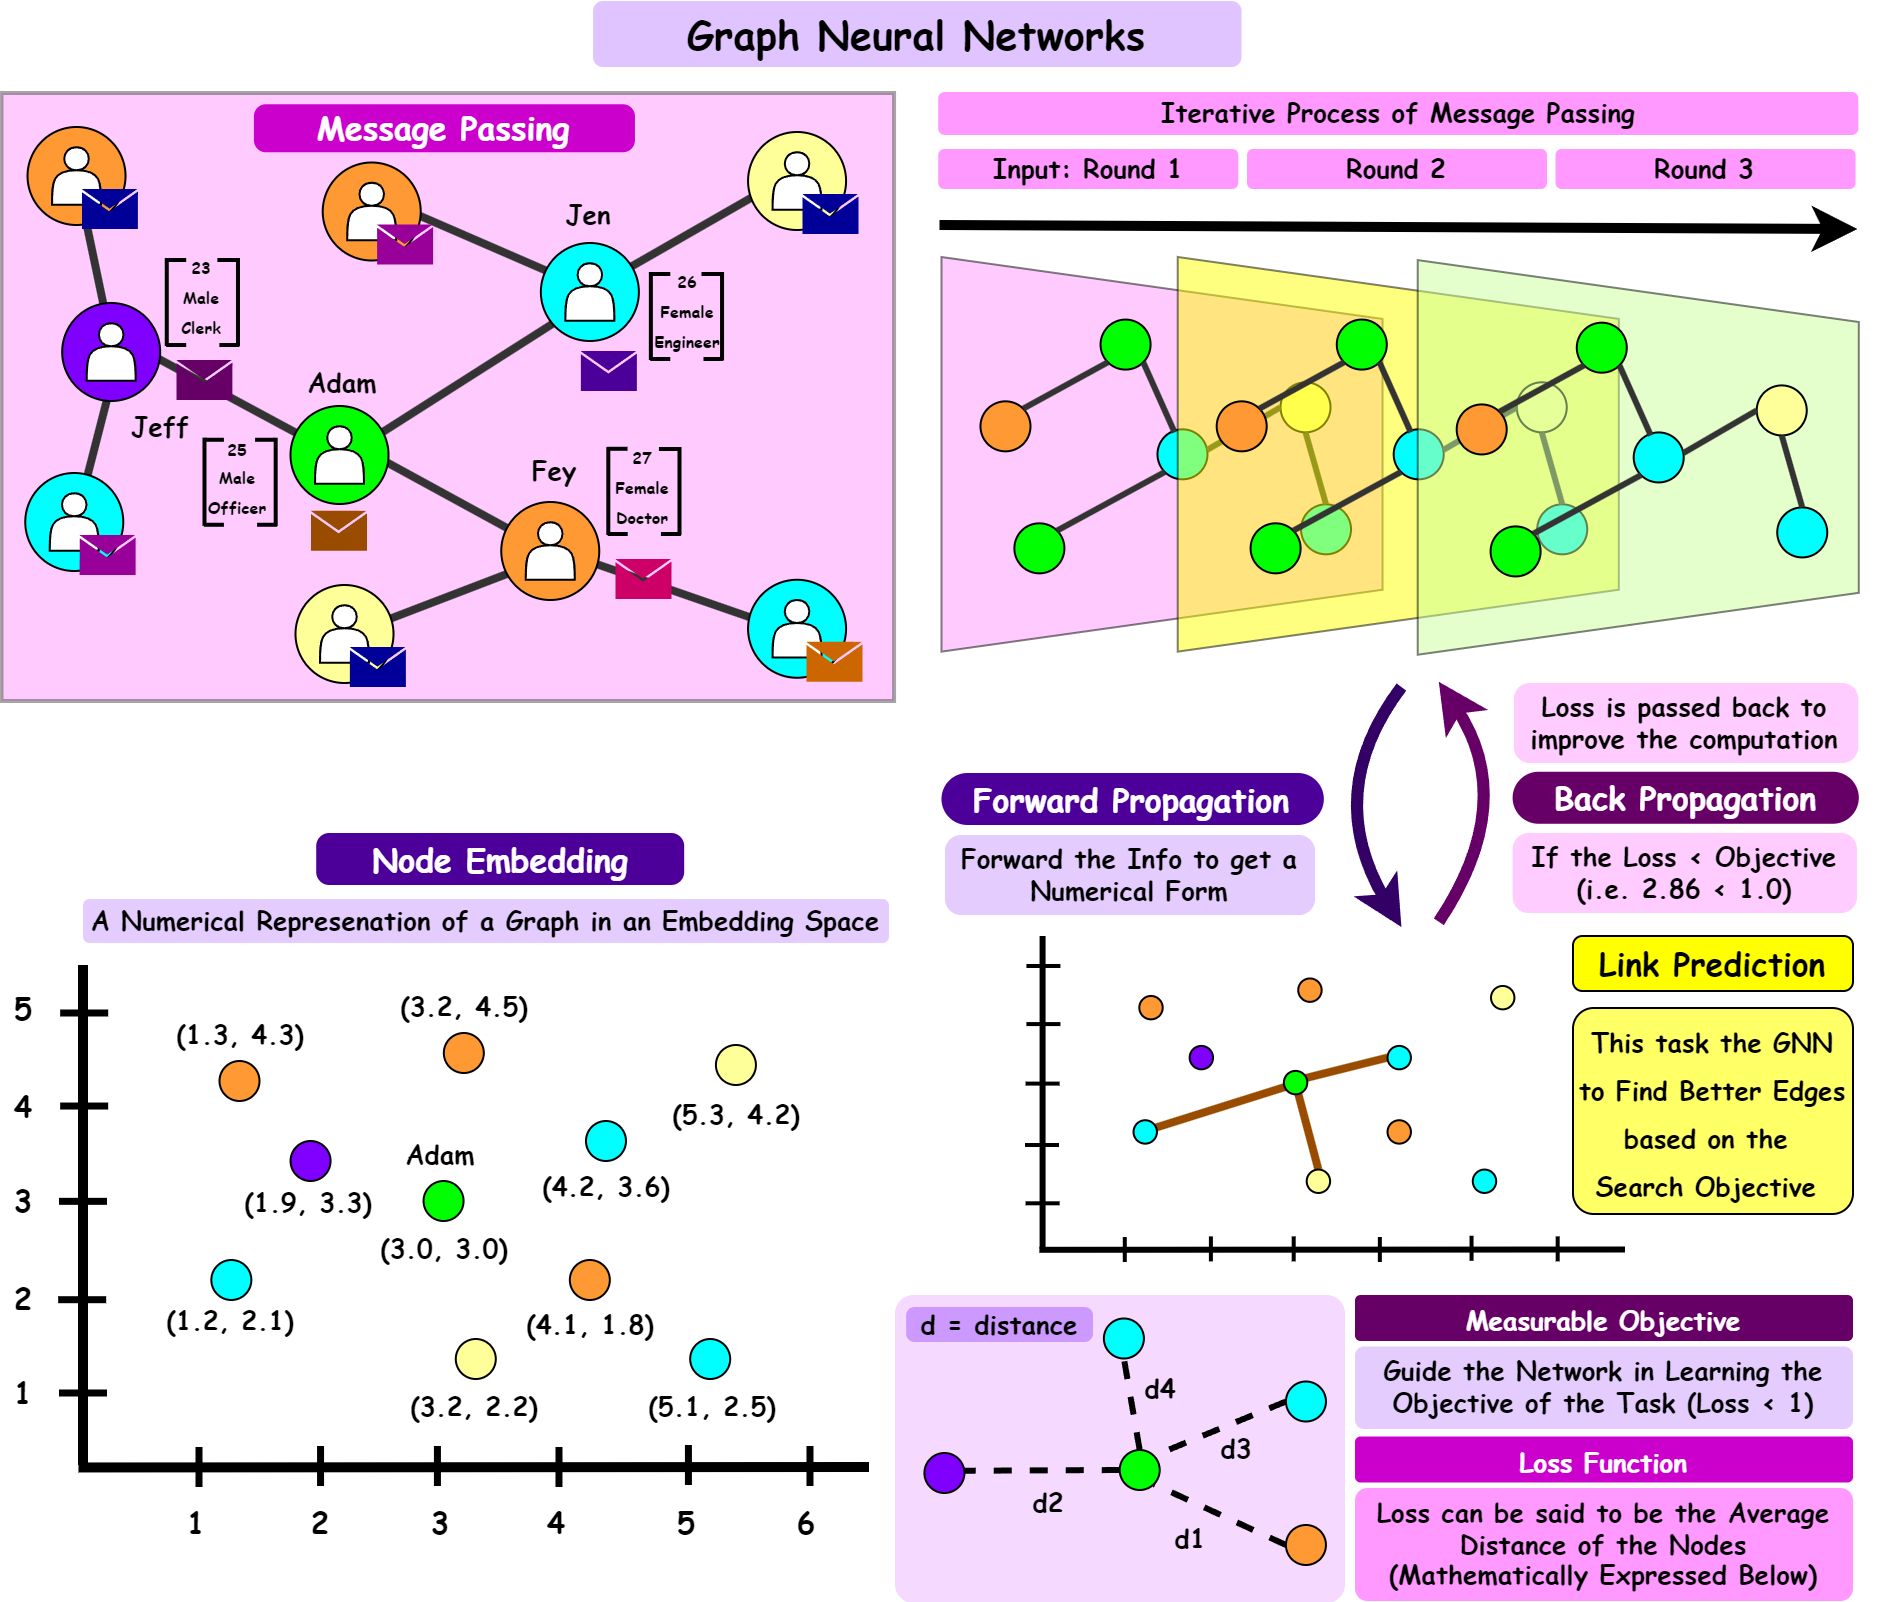

Source: Very Helpful Youtube Reference from Alex Foo! (Link: https://www.youtube.com/watch?v=GXhBEj1ZtE8)

#### **Message Passing** 
Message Passing is the fundamental operation that enables nodes to communicate and learn from their neighbors. It allows information to flow across the graph, enabling nodes to gather details about their local surroundings and, over multiple layers, capture a broader context of the graph structure. Through the exchange of information, nodes learn representations that reflect their local neighborhoods.

During each round of message passing, **Feature Transformation** occurs: node features are updated based on their connections, allowing the model to learn which features are important for the graph’s structure and task. This mechanism also enables **Inductive Learning** — the ability to apply the learned message passing rules to unseen graphs with similar properties. Furthermore, **Permutation Invariance** is naturally handled by message passing frameworks, as aggregation functions are independent of the ordering of nodes or edges.

1. **Message Computation**: Each neighbor $j$ sends a message to node $i$ based on their previous features and the connecting edge
$$m_{j \rightarrow i}^{(l)} = M^{(l)}(h_i^{(l-1)}, h_j^{(l-1)}, e_{j,i})$$

2. **Aggregation**: Node $i$ aggregates incoming messages from all neighbors:
$$a_i^{(l)} = \sum_{j \in \mathcal{N}(i)} m_{j \rightarrow i}^{(l)}$$

3. **Update**: Node $i$ aggregates incoming messages from all neighbors:
$$h_i^{(l)} = U^{(l)}(h_i^{(l-1)}, a_i^{(l)})$$

| Symbol | Description |
|--------|-------------|
| $h_i^{(l)}$ | Feature vector of node $i$ at layer $l$ |
| $m_{j \rightarrow i}^{(l)}$ | Message from node $j$ to node $i$ at layer $l$ |
| $\mathcal{N}(i)$ | Set of neighbor nodes of node $i$ |
| $e_{j,i}$ | Edge features between nodes $j$ and $i$ (if available) |
| $M^{(l)}$ | Message function at layer $l$ |
| $U^{(l)}$ | Update function at layer $l$ |

#### **Learning Objective of the Graph Neural Network** 

The GNN is trained to minimize a loss function that encourages semantically similar nodes to have similar embeddings. The model updates its parameters to minimize this loss over training iterations.

**Measurable Objective:** $$Success Criterion:Loss<Measurable Objective$$

**Loss Function:** 

$$Loss = \frac{1}{|E|}\sum_{(i,j) \in E} ||f(v_i) - f(v_j)||^2$$

| Symbol | Description |
|--------|-------------|
| $v_i$ | Represents node $i$ in the graph |
| $f(v_i)$ | The embedding vector of node $i$ |
| $\|\|f(v_i) - f(v_j)\|\|$ | The distance between node embeddings in the embedding space |
| $E$ | The set of all edges in the graph |
| $\|E\|$ | The total number of edges |

#### **Derivation of the Message Passing Formula** 

Simplify Message Function: In a basic GCN, the message function is often just a feature transformation:

 $$m_{j \rightarrow i}^{(l)} = W^{(l)} h_j^{(l-1)}$$

Introduce Adjacency Weights:The coefficients $c_{i,j}$​ determine how much information flows from node $j$ to node $i$:

 $$m_{j \rightarrow i}^{(l)} = c_{i,j} \cdot W^{(l)} h_j^{(l-1)}$$

Aggregation Step: For node $i$, aggregate messages from all nodes (including itself):

 $$a_i^{(l)} = \sum_{j=1}^{n} c_{i,j} \cdot W^{(l)} h_j^{(l-1)}$$

Update Step: In simple GCNs, the update function is often just the aggregated messages:

 $$h_i^{(l)} = a_i^{(l)} = \sum_{j=1}^{n} c_{i,j} \cdot W^{(l)} h_j^{(l-1)}$$

For Adam (Node 1) Specifically:

 $$h_1^{(l)} = c_{1,1} \cdot W^{(l)} h_1^{(l-1)} + c_{1,2} \cdot W^{(l)} h_2^{(l-1)} + c_{1,3} \cdot W^{(l)} h_3^{(l-1)} + c_{1,4} \cdot W^{(l)} h_4^{(l-1)}$$

<br>Matching the Image Notation: Using $x_i$ to represent $h_i^{(l-1)}$ and $f(x_i)$ to represent $h_i^{(l)}$:

$$f(x_1) = c_{1,1}x_1W + c_{1,2}x_2W + c_{1,3}x_3W + c_{1,4}x_4W$$

$$F(X) = C \cdot X \cdot W$$

| Symbol | Description | Dimensions | Notes |
|--------|-------------|-----------|-------|
| $C$ | Adjacency matrix | $n \times n$ | Represents connections between nodes in a graph |
| $X$ | Node feature matrix | $n \times d$ | Contains feature vectors for each node |
| $W$ | Learnable weight matrix | $d \times d'$ | Transforms node features to new representation space |
| $F(X)$ | Updated node representations | $n \times d'$ | Result after applying weight transformation to features |


### **Full Matrix Representation of the Message Passing Formula**

In many practical Graph Neural Networks the message passing can be written more compactly using matrix operations as shown below.

$$F(X) = C \cdot X \cdot W \; \text{(Message Passing Formula)}$$

$$F(X) = 
\underbrace{
\begin{bmatrix}
c_{11} & c_{12} & c_{13} & c_{14} \\
c_{21} & c_{22} & c_{23} & c_{24} \\
c_{31} & c_{32} & c_{33} & c_{34} \\
c_{41} & c_{42} & c_{43} & c_{44}
\end{bmatrix}
}_{\text{Adjacency Matrix } C\ (4\times4)}
\cdot
\underbrace{
\begin{bmatrix}
x_{11} & x_{12} & \cdots & x_{17} \\
x_{21} & x_{22} & \cdots & x_{27} \\
x_{31} & x_{32} & \cdots & x_{37} \\
x_{41} & x_{42} & \cdots & x_{47}
\end{bmatrix}
}_{\text{Node Feature Matrix } X\ (4\times7)}
\cdot
\underbrace{
\begin{bmatrix}
w_{11} & w_{12} & w_{13} & w_{14} \\
w_{21} & w_{22} & w_{23} & w_{24} \\
\vdots & \vdots & \vdots & \vdots \\
w_{71} & w_{72} & w_{73} & w_{74}
\end{bmatrix}
}_{\text{Weight Matrix } W\ (7\times4)}$$


#### **The Node Feature Matrix**

In the Feature Matrix $X$, each row represents the Feature Vector $x_i$ for node $i$, and binary values (0 or 1) represent the absence or presence of categorical features. Numerical values like Age and Salary can also be used to represent features. The First index $i$ in $x_{ij}$ represents the node (1=Jeff, 2=Adam, 3=Jen, 4=Fey) whilst the second index $j$ represents the feature type:

$$X = 
\begin{bmatrix} 
x_{11} & x_{12} & \cdots & x_{17} & x_{18} \\
x_{21} & x_{22} & \cdots & x_{27} & x_{28} \\
x_{31} & x_{32} & \cdots & x_{37} & x_{38} \\
x_{41} & x_{42} & \cdots & x_{47} & x_{48}
\end{bmatrix} = 
\begin{bmatrix} 
\text{age}_{Jeff} & \text{male}_{Jeff} & \cdots & \text{doctor}_{Jeff} & \text{salary}_{Jeff} \\
\text{age}_{Adam} & \text{male}_{Adam} & \cdots & \text{doctor}_{Adam} & \text{salary}_{Adam} \\
\text{age}_{Jen} & \text{male}_{Jen} & \cdots & \text{doctor}_{Jen} & \text{salary}_{Jen} \\
\text{age}_{Fey} & \text{male}_{Fey} & \cdots & \text{doctor}_{Fey} & \text{salary}_{Fey}
\end{bmatrix}$$

$$X = 
\begin{bmatrix} 
23 & 1 & 0 & 1 & 0 & 0 & 0 & 45 \\
25 & 1 & 0 & 0 & 1 & 0 & 0 & 65 \\
26 & 0 & 1 & 0 & 0 & 1 & 0 & 75 \\
27 & 0 & 1 & 0 & 0 & 0 & 1 & 90
\end{bmatrix}$$

#### **Node Features with Matrix Indices**

| Node | Feature <br> Vector | Age <br> ($x_{i1}$) | Male <br> ($x_{i2}$) | Female <br> ($x_{i3}$) | Clerk <br> ($x_{i4}$) | Officer <br> ($x_{i5}$) | Engineer <br> ($x_{i6}$) | Doctor <br> ($x_{i7}$) | Salary <br> ($x_{i8}$) |
|------|--------|--------------|--------------|--------------|--------------|----------------|---------------|--------------|---------------|
| Jeff | $x_{1j}$ | 23 | 1 | 0 | 1 | 0 | 0 | 0 | 45 |
| Adam | $x_{2j}$ | 25 | 1 | 0 | 0 | 1 | 0 | 0 | 65 |
| Jen  | $x_{3j}$ | 26 | 0 | 1 | 0 | 0 | 1 | 0 | 75 |
| Fey  | $x_{4j}$ | 27 | 0 | 1 | 0 | 0 | 0 | 1 | 90 |
| Tom  | $x_{5j}$ | 29 | 1 | 0 | 0 | 0 | 1 | 0 | 80 |


### **Example: Complete Graph Neural Network Calculation**

##### Step 1: Define the Adjacency Matrix C:

$$C = \begin{bmatrix} 
0.5 & 0.35 & 0 & 0 \\
0.35 & 0.25 & 0.35 & 0.35 \\
0 & 0.35 & 0.5 & 0 \\
0 & 0.35 & 0 & 0.5
\end{bmatrix}_{4 \times 4}$$

##### Step 2: Initialize the Weight Matrix using Xavier Initialization:

$$W = \begin{bmatrix} 
0.1 & -0.05 & 0.08 & 0.03 \\
0.12 & 0.07 & -0.09 & 0.11 \\
-0.08 & 0.13 & 0.06 & -0.04 \\
0.09 & 0.06 & 0.05 & 0.12 \\
-0.1 & 0.08 & 0.11 & -0.07 \\
0.07 & -0.06 & 0.09 & 0.10 \\
0.05 & 0.11 & -0.08 & 0.04
\end{bmatrix}_{7 \times 4}$$

##### Step 3: Calculate (Feature Transformation): 

$$X \cdot W = \begin{bmatrix} 
2.51 & -1.04 & 1.79 & 0.92 \\
2.42 & -0.6 & 2.08 & 0.67 \\
2.52 & 0.19 & 2.37 & 1.01 \\
2.57 & 0.86 & 1.94 & 0.19
\end{bmatrix}_{4 \times 4}$$

##### Step 4: Calculate ther Product of the Message Passing

$$F(X) = C \cdot (X \cdot W) = \begin{bmatrix} 
2.10 & -0.73 & 1.62 & 0.69 \\
2.52 & -0.11 & 2.09 & 0.71 \\
2.53 & -0.20 & 2.27 & 0.85 \\
2.50 & -0.08 & 2.01 & 0.43
\end{bmatrix}_{4 \times 4}$$

#### Step 5: Apply Activation Function (ReLU)

$$\sigma(F(X)) = \max(0, F(X)) = \begin{bmatrix} 
2.10 & 0 & 1.62 & 0.69 \\
2.52 & 0 & 2.09 & 0.71 \\
2.53 & 0 & 2.27 & 0.85 \\
2.50 & 0 & 2.01 & 0.43
\end{bmatrix}_{4 \times 4}$$

##### Step 6: Calculate and Compare the Loss Function for Graph Embeddings:

$$Loss = \frac{1}{|E|}\sum_{(i,j) \in E} ||f(v_i) - f(v_j)||^2$$

This encourages connected nodes to have similar embeddings by minimizing the squared Euclidean distance between them. For our example with embeddings:

- Jeff: $f(x_1) = [2.10, 0, 1.62, 0.69]$
- Adam: $f(x_2) = [2.52, 0, 2.09, 0.71]$
- Jen: $f(x_3) = [2.53, 0, 2.27, 0.85]$
- Fey: $f(x_4) = [2.50, 0, 2.01, 0.43]$

And edge set $E = \{(Jeff, Adam), (Adam, Jen), (Adam, Fey)\}$

$$||f(x_1) - f(x_2)||^2 = 0.2517$$
$$||f(x_2) - f(x_3)||^2 = 0.0533$$
$$||f(x_2) - f(x_4)||^2 = 0.0872$$

$$Loss = \frac{1}{3}(0.2517 + 0.0533 + 0.0872) = 0.1307$$

The model is successful if $\text{Loss < Measurable Objective}$. This means that the average squared distance between the connected nodes fall below the required threshold.